In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

# PART 1

In [2]:
#import data
df = pd.read_json('./logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df_r = df.resample('15Min', on='login_time',loffset='15Min').count()
df_r = df_r.rename(columns = {'login_time': 'count'})
df_r.index = df_r.index.astype(str).str[-8:]
count = df_r.groupby(by='login_time').agg('sum')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20908\1500960145.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_r = df.resample('15Min', on='login_time',loffset='15Min').count()


In [5]:
count.head()

,count
login_time,
00:00:00,1477
00:15:00,1439
00:30:00,1547
00:45:00,1525
01:00:00,1482


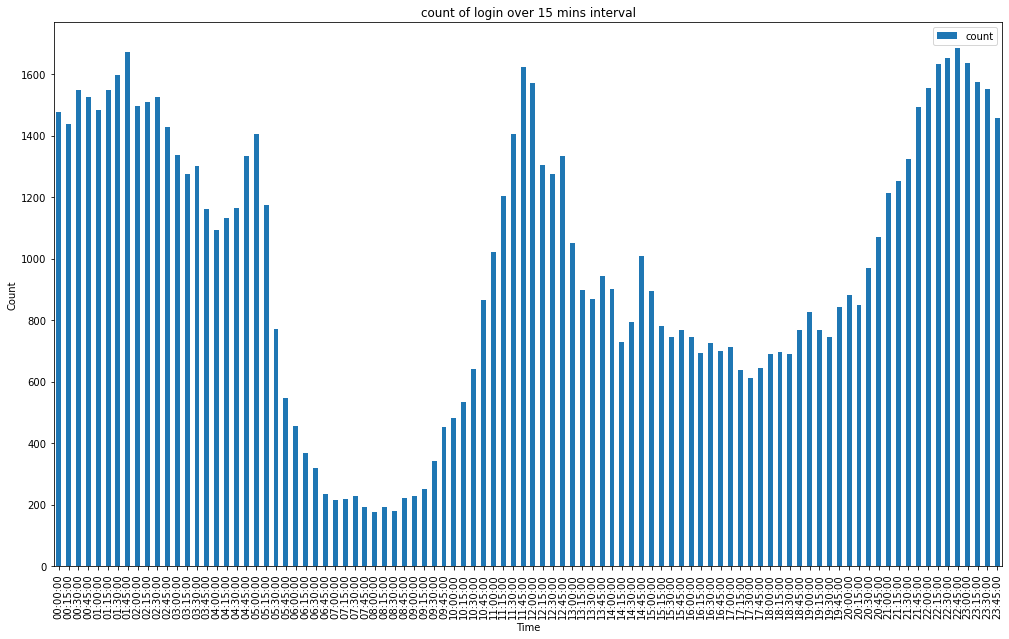

In [6]:
count.plot(kind='bar', figsize=(17, 10))
plt.title('count of login over 15 mins interval')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

There are two parts have login peaks in a day. One is 10:30 to 13:00. Another is 21:00 to 5:00.

# PART 2

In [7]:
df2 = pd.read_json('./ultimate_data_challenge.json')

In [8]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

avg_dist and trips_in_first_30_days would be my first consideration for key measure of this experiment. 1. I have to make sure trip times is increasing after changine. 2. I have to make sure those increasing trip is between Gotham and Metropolis.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a)how you will implement the experiment

I would track all drives in those two cities' avg_dist and trips_in_first_30_days.

b)what statistical test(s) you will conduct to verify the significance of the observation

I will use hypothesis testing in this experiment

c)how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Null hypothesis: there is no significant difference in ratio of avg_dist and trips_in_first_30_days across cities

With p value below 0.05 we will reject the null hypothesis and accept that there is a significant difference in availability of drivers in specific cities.

Conclusion: The experiment to encourage driver partners to be available in both cities,by reimbursing all toll charges has been as effective.

# PART 3

In [9]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [10]:
print(df2.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


We have plenty of avg_rating_of_driver data missing. Those data with missing avg_rating_of_driver are useless, because they are either register by the end of January or they lost their avg_rating_of_driver.

In [11]:
(1-df2.avg_rating_of_driver.isnull().sum()/df2.shape[0])*100

83.756

So we have 83.76% of data retained.

In [12]:
df2 = df2.dropna()

In [13]:
print(df2.isnull().sum())

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


<AxesSubplot:>

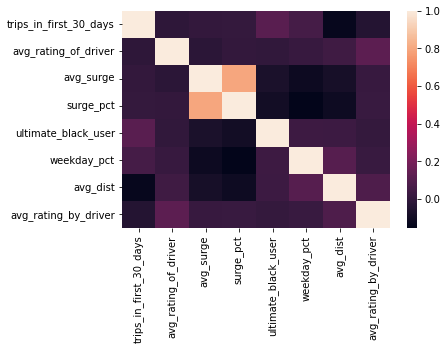

In [14]:
import seaborn as sns
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

There are only avg_surge and surge_pct have positive relationship. So we will delete all surge_pct, and keep all avg_surge

In [15]:
df2 = df2.drop(['surge_pct'], axis=1)

In [16]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,False,82.4,3.13,4.9


We still have city, phone and ultimate_black_user as text. data of phone and ultimate_black_user should change to number.

In [21]:
phone = {'phone': {'iPhone': 0, 'Android': 1}, }
user = {'ultimate_black_user': {True:0, False:1}}

df2 = df2.replace(phone)
df2 = df2.replace(user)

In [22]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,0,0,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,1,1,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0,1,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,0,0,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,1,1,82.4,3.13,4.9


In [29]:
X = df2.drop(['city', 'last_trip_date', 'signup_date', 'ultimate_black_user'], axis=1)
y = df2.ultimate_black_user

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=666)

In [60]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=666)

In [61]:
y_pred = clf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test, y_pred)

0.6213053444323803

In [63]:
confusion_matrix(y_test, y_pred)

array([[ 190, 3003],
       [ 136, 4960]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.06      0.11      3193
           1       0.62      0.97      0.76      5096

    accuracy                           0.62      8289
   macro avg       0.60      0.52      0.43      8289
weighted avg       0.61      0.62      0.51      8289

